In [1]:
!pip install autocorrect
!pip install symspellpy jamo hangul_utils
!pip install transformers
!pip install preprocess
!pip install contractions
!pip install symspellpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=347dd0bb760d66ec93db8ba838632433019f68560cc390f8a5af66685f653f42
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 11.2 MB/s eta 0:00:00
  Prep

In [2]:
import pkg_resources
from symspellpy import SymSpell, Verbosity
import itertools
# Importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from transformers import BertTokenizer, BertModel
from transformers import get_linear_schedule_with_warmup
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import AdamW
import pandas as pd
import preprocess
import numpy as np
from sklearn import preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import requests
import unicodedata
import tqdm
import contractions
import spacy
from spacy.cli import download
import sys
import gensim
from gensim.models.phrases import Phrases, Phraser
import multiprocessing
from gensim.models import Word2Vec, KeyedVectors
import transformers
import tensorflow as tf
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from autocorrect import Speller
spell = Speller(lang='en')

In [4]:
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

In [5]:
def correct_spelling_symspell(text):
    words = [
        sym_spell.lookup(
            word, 
            Verbosity.CLOSEST, 
            max_edit_distance=2,
            include_unknown=True
            )[0].term 
        for word in text.split()] 
    text = " ".join(words)
    tweet = spell(text)
    return tweet

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
nlp = spacy.load('en_core_web_sm')

In [8]:
# Loading the dataset
df = pd.read_csv('Combined_News_DJIA.csv', encoding = 'ISO-8859-1')
df.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [9]:
data_stocks = pd.read_csv("upload_DJIA_table.csv")

In [10]:
#df1 = data_stocks.set_index('Date')
df1 = data_stocks[::-1]
df1 = df1.set_index('Date')
df1

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


In [11]:
data= df.merge(df1, how='inner', on='Date')
data.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727


In [12]:
def remove_special_characters(text, remove_digits= True):
    #text = text.replace('$', 'currency')
    pattern = r'[^\w]+' if not remove_digits else r'[^a-zA-Z]'
    text = re.sub(pattern," ",text)
    text = re.sub(r'\s+',' ', text)
    return text

def remove_accented_characters(text):
    text =  unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
    return text

def remove_extra_spaces(text):
    text = re.sub(' +', ' ', text).strip()
    return text

def correct_spelling_symspell(text):
    words = [
        sym_spell.lookup(
            word, 
            Verbosity.CLOSEST, 
            max_edit_distance=2,
            include_unknown=True
            )[0].term 
        for word in text.split()] 
    tweet = " ".join(words)
    text = spell(text)
    return text

def correct_spelling_symspell_compound(text):
    words = [
        sym_spell.lookup_compound(
            word, 
            max_edit_distance=2
            )[0].term 
        for word in text.split()] 
    text = " ".join(words)
    return text

def spacy_lemma(text):
    text = nlp(text)
    new_text = []
    words = [word.lemma_ for word in text]
    for small in words:
        if small == '-PRON-':
            pass
        else:
            new_text.append(small)

    return ' '.join(new_text)

def contractions_text(text):
    return contractions.fix(text)

def stop_words_removal(text, is_lower_case = False, stopwords = None):
    if stopwords == None:
        stopwords = nlp.Defaults.stop_words
    
    if not is_lower_case:
        text = text.lower()
    tokens = nltk.word_tokenize(text)
    new_token = []
    for i in tokens:
        if len(i)<=1:
            pass
        else:
            new_token.append(i)
    
    removed_text = [word for word in new_token if word not in stopwords]
    
    return ' '.join(removed_text)


def preprocessor_engine(text):
    corpus =[]
    for sent in tqdm.tqdm(text):
        sent = remove_accented_characters(sent)
        sent = contractions_text(sent)
        sent = remove_special_characters(sent)
        sent = spacy_lemma(sent)
        sent = stop_words_removal(sent)

        sent = remove_extra_spaces(sent)
        sent = correct_spelling_symspell(sent)
        sent = correct_spelling_symspell_compound(sent)
        

        corpus.append(sent)
    return corpus

In [13]:
#Combine the top news headline:

headline= []

for row  in range (0, len(df.index)):
    headline.append(" ".join(str(x) for x in df.iloc[row, 2:20]))


In [14]:
headline[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [15]:
data_train = preprocessor_engine(headline)

100%|██████████| 1989/1989 [26:11<00:00,  1.27it/s]


In [16]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# Creating corpus of train dataset
ps = PorterStemmer()
data_1 = []

for i in range(0, len(data_train)):
  
  # Tokenizing the news-title by words
  words = data_train[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  data_1.append(headline)

In [18]:
data_1[0]

'georgia russian airplan countri brink war break musharraf impeach russia today column troop roll south ossetia footag fight youtub russian tank capit south ossetia reportedli complet destroy georgia artilleri fire afghan child rape impun offici sick year old rape russian tank enter south ossetia whilst georgia shoot russian jet break georgia invad south ossetia russia warn interven enemi combat trial sham slim human sentenc year long feel like georgia troop retreat osettain capit presum leav peopl kill video prep georgia war russia rice green light israel attack iran veto isra militari op announc class action lawsuit behalf american public fbi russia georgia war nyt stori open ceremoni olymp fuck disgrac proof declin journal china tell bush stay countri affair world war iii start today georgia invad south ossetia russia involv nato absorb georgia unleash scale war al qaeda face islam backlash condoleezza rice act prevent isra strike iran isra defens minist bark israel prepar compromis

In [19]:
data["cleaned_data"] = data_1

In [20]:
data.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,cleaned_data
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,georgia russian airplan countri brink war brea...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,america nato help help help iraq bush foot geo...


In [21]:
data["spellcheck"] = data["cleaned_data"].apply(correct_spelling_symspell)

In [22]:
data.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,cleaned_data,spellcheck
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,georgia russian airplan countri brink war brea...,georgia russian airplane country brink war bre...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,america nato help help help iraq bush foot geo...,america nato help help help iraq bush foot geo...


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import numpy as np # linear algebra
import keras
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, Flatten, Dropout, Concatenate
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model
from keras.callbacks import EarlyStopping
import gensim
import nltk
from nltk.tokenize import RegexpTokenizer
import re
import codecs

In [25]:

EMBEDDING_DIM = 300 
MAX_VOCAB_SIZE = 175303 
MAX_SEQUENCE_LENGTH = 160 

#training params
batch_size = 64 
num_epochs = 2

In [26]:
tokenizer = RegexpTokenizer(r'\w+')

In [27]:
data["tokens"] = data["spellcheck"].apply(tokenizer.tokenize)

In [28]:
training_word_list = [word for tokens in data["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data["tokens"]]
vocab_train = sorted(list(set(training_word_list)))
print("%s words total, with a vocabulary size of %s" % (len(training_word_list), len(vocab_train)))
print("Max sentence length is %s" % max(training_sentence_lengths))

390166 words total, with a vocabulary size of 13009
Max sentence length is 302


In [29]:
import numpy as np


In [30]:
word2vec_path = "/content/drive/MyDrive/GoogleNews-vectors-negative300.bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [31]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_message, generate_missing=False):
    embeddings = clean_message['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [32]:
training_embeddings = get_word2vec_embeddings(word2vec, data, generate_missing=True)

In [33]:

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, lower=True, char_level=False)
tokenizer.fit_on_texts(data["cleaned_data"].tolist())
training_sequences = tokenizer.texts_to_sequences(data["cleaned_data"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

Found 14506 unique tokens.
(14507, 300)


In [34]:
train_embedding_weights

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06176758,  0.2578125 ,  0.00367737, ...,  0.11181641,
         0.07275391, -0.17480469],
       [ 0.00836182,  0.08398438,  0.21582031, ..., -0.11132812,
         0.01251221, -0.00198364],
       ...,
       [ 0.20210002,  0.62828625,  0.89932235, ...,  0.81673065,
         0.2879727 ,  0.16295977],
       [ 0.69282588,  0.71613383,  0.8530261 , ...,  0.37786686,
         0.60796373,  0.97234149],
       [-0.07275391, -0.00271606,  0.02075195, ...,  0.02648926,
        -0.02441406,  0.05078125]])

In [50]:
train_cnn_data.shape

(1989, 160)

In [45]:
df_train = train_cnn_data

In [46]:
y_tr = data.Close.values

In [48]:

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

In [49]:
hist = model.fit(df_train, y_tr, epochs=num_epochs, callbacks=callbacks_list, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/2
28/28 [==============================] - 115s 4s/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/2
28/28 [==============================] - 108s 4s/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


In [22]:
data1_new = data.set_index('Date')

In [77]:
X = train_cnn_data
y = data.Close.values

In [78]:
X.shape

(1989, 160)

In [79]:
y.shape

(1989,)

In [80]:
len(X)

1989

In [81]:
len(y)

1989

In [82]:
## feature matrix
X_feature = [np.asarray(X, dtype='int32')]

In [83]:
y_feature = [np.asarray(y, dtype='int32')]

In [84]:
## bert tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [85]:
## bert model
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [86]:
## pre-trained bert with config
config = transformers.DistilBertConfig(dropout=0.2, 
           attention_dropout=0.2)
config.output_hidden_states = False

In [87]:
nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased',config = config)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [88]:
## pre-trained bert
nlp = transformers.TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [89]:
price_data = layers.Input((160),dtype="int32", name="input_price_data")

In [90]:
bert_out = nlp([price_data])

In [91]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

In [92]:
bert_out[0][0]


<KerasTensor: shape=(160, 768) dtype=float32 (created by layer 'tf.__operators__.getitem_1')>

In [93]:
## pre-trained bert with config
config = transformers.BertConfig(dropout=0.2, 
           attention_dropout=0.2)
config.output_hidden_states = False

In [94]:
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out[0])
x = layers.Dense(4096, activation="relu")(x)
x = layers.Dense(4096, activation="relu")(x)
x = layers.Dense(4096, activation="relu")(x)
x = layers.Dense(4096, activation="relu")(x)
x = layers.Dense(4096, activation="relu")(x)
x = layers.Dense(4096, activation="relu")(x)
x = layers.Dense(4096, activation="relu")(x)
x = layers.Dense(4096, activation="relu")(x)
y_out = layers.Dense(1)(x)

In [95]:
## compile
model_1 = models.Model([ price_data], y_out)


In [96]:
model_1.compile(loss=keras.losses.mae,
                    optimizer=keras.optimizers.Adam(learning_rate = 0.00001), 
                    metrics=['mae'])

In [97]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_price_data (InputLaye  [(None, 160)]            0         
 r)                                                              
                                                                 
 tf_bert_model_3 (TFBertMode  TFBaseModelOutputWithPoo  109482240
 l)                          lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             160, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                    

In [ ]:
## train
training = model_1.fit(X_feature, y_feature, batch_size= 32, epochs=1028, shuffle=True,callbacks=callbacks, verbose=1,validation_split = 0.1)

Epoch 1/1028


In [73]:
model_1.evaluate(X_feature_new_1 ,y_test)

13/13 [==============================] - 3s 48ms/step - loss: 1709.9230 - mae: 1709.9230


[1709.9229736328125, 1709.9229736328125]

In [74]:
## train
training_1 = model_1.fit(x_train, y_train, batch_size= 8, epochs=1028, shuffle=True,callbacks=callbacks, verbose=1,validation_split = 0.1)

Epoch 1/1028
179/179 [==============================] - 23s 126ms/step - loss: 1058.9312 - mae: 1058.9312 - val_loss: 2611.0369 - val_mae: 2611.0369
Epoch 2/1028
179/179 [==============================] - 17s 97ms/step - loss: 745.9571 - mae: 745.9571 - val_loss: 1024.2552 - val_mae: 1024.2552
Epoch 3/1028
179/179 [==============================] - 17s 97ms/step - loss: 547.2528 - mae: 547.2528 - val_loss: 2217.2356 - val_mae: 2217.2356
Epoch 4/1028
179/179 [==============================] - 17s 96ms/step - loss: 527.2429 - mae: 527.2429 - val_loss: 1432.6025 - val_mae: 1432.6025
Epoch 5/1028
179/179 [==============================] - 16s 92ms/step - loss: 434.8275 - mae: 434.8275 - val_loss: 1767.8970 - val_mae: 1767.8970
Epoch 6/1028
179/179 [==============================] - 17s 93ms/step - loss: 449.9614 - mae: 449.9614 - val_loss: 1663.7142 - val_mae: 1663.7142
Epoch 7/1028
179/179 [==============================] - 17s 97ms/step - loss: 382.0664 - mae: 382.0664 - val_loss: 2009.2

In [236]:
#model_1.evaluate(X_feature_new_1,y_test)

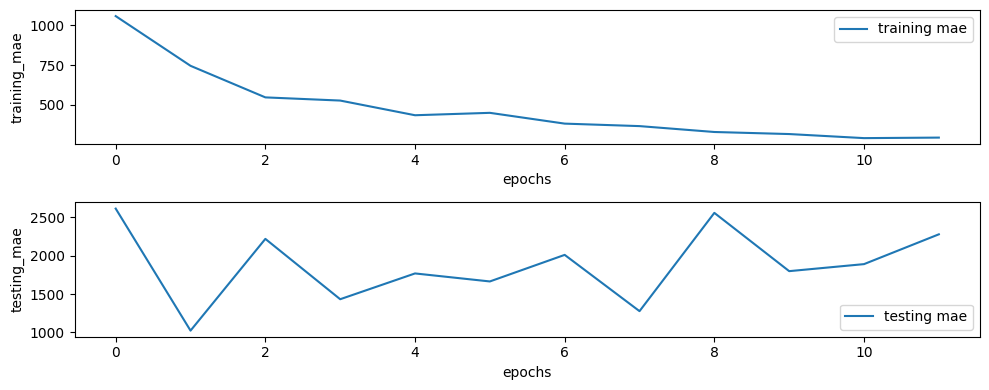

In [75]:
model_history = pd.DataFrame(training_1.history)
model_history['epoch'] = training_1.epoch

fig, ax = plt.subplots(2,1, figsize=(10,4))
num_epochs = model_history.shape[0]
num_epochs = model_history.shape[0]

ax[0].plot(np.arange(0, num_epochs), model_history["mae"], 
        label="training mae")
ax[1].plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="testing mae")



ax[0].set_ylabel('training_mae')
ax[0].set_xlabel('epochs')
ax[1].set_ylabel('testing_mae')
ax[1].set_xlabel('epochs')
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

In [77]:
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out[0])
x = layers.Dense(2048, activation="relu")(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.Dense(2048, activation="relu")(x)
y_out = layers.Dense(1)(x)

## compile
model_1 = models.Model([ price_data], y_out)

model_1.compile(loss=keras.losses.mae,
                    optimizer=keras.optimizers.Adam(learning_rate = 0.00001), 
                    metrics=['mae'])

## train
training_2 = model_1.fit(x_train, y_train, batch_size= 8, epochs=1028, shuffle=True,callbacks=callbacks, verbose=1,validation_split = 0.1)


Epoch 1/1028


179/179 [==============================] - 71s 117ms/step - loss: 6977.2568 - mae: 6977.2568 - val_loss: 5051.0796 - val_mae: 5051.0796
Epoch 2/1028
179/179 [==============================] - 18s 102ms/step - loss: 1084.6046 - mae: 1084.6046 - val_loss: 1582.8521 - val_mae: 1582.8521
Epoch 3/1028
179/179 [==============================] - 15s 81ms/step - loss: 548.2230 - mae: 548.2230 - val_loss: 2221.8123 - val_mae: 2221.8123
Epoch 4/1028
179/179 [==============================] - 15s 81ms/step - loss: 484.3939 - mae: 484.3939 - val_loss: 2710.8730 - val_mae: 2710.8730
Epoch 5/1028
179/179 [==============================] - 14s 80ms/step - loss: 470.9146 - mae: 470.9146 - val_loss: 2648.1326 - val_mae: 2648.1326
Epoch 6/1028
179/179 [==============================] - 15s 81ms/step - loss: 372.6527 - mae: 372.6527 - val_loss: 2171.5649 - val_mae: 2171.5649
Epoch 7/1028
179/179 [==============================] - 14s 81ms/step - loss: 369.2397 - mae: 369.2397 - val_loss: 2260.3835 - val_

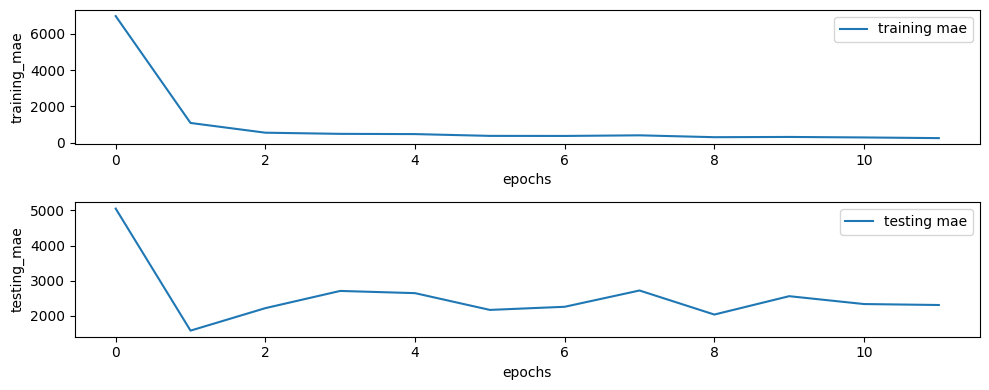

In [78]:
model_history = pd.DataFrame(training_2.history)
model_history['epoch'] = training_2.epoch

fig, ax = plt.subplots(2,1, figsize=(10,4))
num_epochs = model_history.shape[0]
num_epochs = model_history.shape[0]

ax[0].plot(np.arange(0, num_epochs), model_history["mae"], 
        label="training mae")
ax[1].plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="testing mae")



ax[0].set_ylabel('training_mae')
ax[0].set_xlabel('epochs')
ax[1].set_ylabel('testing_mae')
ax[1].set_xlabel('epochs')
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

In [79]:
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out[0])
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
y_out = layers.Dense(1)(x)

## compile
model_1 = models.Model([ price_data], y_out)

model_1.compile(loss=keras.losses.mae,
                    optimizer=keras.optimizers.Adam(learning_rate = 0.00001), 
                    metrics=['mae'])

## train
training_3 = model_1.fit(x_train, y_train, batch_size= 8, epochs=1028, shuffle=True,callbacks=callbacks, verbose=1,validation_split = 0.1)


Epoch 1/1028


179/179 [==============================] - 73s 112ms/step - loss: 9839.2344 - mae: 9839.2344 - val_loss: 6286.6846 - val_mae: 6286.6846
Epoch 2/1028
179/179 [==============================] - 14s 80ms/step - loss: 1293.2661 - mae: 1293.2661 - val_loss: 1720.5264 - val_mae: 1720.5264
Epoch 3/1028
179/179 [==============================] - 14s 77ms/step - loss: 614.2542 - mae: 614.2542 - val_loss: 2732.6760 - val_mae: 2732.6760
Epoch 4/1028
179/179 [==============================] - 14s 77ms/step - loss: 474.0382 - mae: 474.0382 - val_loss: 2856.2534 - val_mae: 2856.2534
Epoch 5/1028
179/179 [==============================] - 14s 78ms/step - loss: 400.2474 - mae: 400.2474 - val_loss: 2457.6462 - val_mae: 2457.6462
Epoch 6/1028
179/179 [==============================] - 14s 77ms/step - loss: 374.6931 - mae: 374.6931 - val_loss: 2708.5708 - val_mae: 2708.5708
Epoch 7/1028
179/179 [==============================] - 14s 79ms/step - loss: 353.1197 - mae: 353.1197 - val_loss: 3079.1125 - val_m

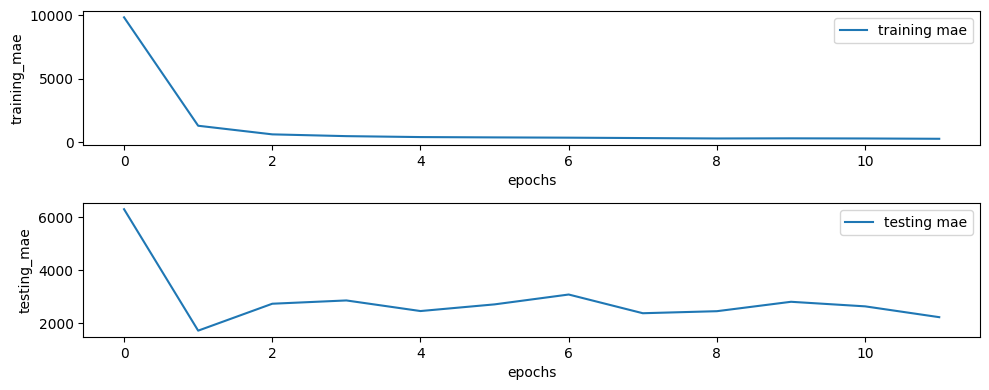

In [80]:
model_history = pd.DataFrame(training_3.history)
model_history['epoch'] = training_3.epoch

fig, ax = plt.subplots(2,1, figsize=(10,4))
num_epochs = model_history.shape[0]
num_epochs = model_history.shape[0]

ax[0].plot(np.arange(0, num_epochs), model_history["mae"], 
        label="training mae")
ax[1].plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="testing mae")



ax[0].set_ylabel('training_mae')
ax[0].set_xlabel('epochs')
ax[1].set_ylabel('testing_mae')
ax[1].set_xlabel('epochs')
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

In [81]:
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out[0])
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
y_out = layers.Dense(1)(x)

## compile
model_1 = models.Model([ price_data], y_out)

model_1.compile(loss=keras.losses.mae,
                    optimizer=keras.optimizers.Adam(learning_rate = 0.00001), 
                    metrics=['mae'])

## train
training_4 = model_1.fit(x_train, y_train, batch_size= 8, epochs=1028, shuffle=True,callbacks=callbacks, verbose=1,validation_split = 0.1)


Epoch 1/1028


179/179 [==============================] - 77s 113ms/step - loss: 11867.8428 - mae: 11867.8428 - val_loss: 16087.2422 - val_mae: 16087.2422
Epoch 2/1028
179/179 [==============================] - 15s 82ms/step - loss: 3824.8606 - mae: 3824.8606 - val_loss: 3425.9111 - val_mae: 3425.9111
Epoch 3/1028
179/179 [==============================] - 15s 82ms/step - loss: 621.7322 - mae: 621.7322 - val_loss: 2760.4690 - val_mae: 2760.4690
Epoch 4/1028
179/179 [==============================] - 16s 89ms/step - loss: 446.5757 - mae: 446.5757 - val_loss: 2311.5137 - val_mae: 2311.5137
Epoch 5/1028
179/179 [==============================] - 14s 80ms/step - loss: 397.2358 - mae: 397.2358 - val_loss: 3411.1738 - val_mae: 3411.1738
Epoch 6/1028
179/179 [==============================] - 14s 81ms/step - loss: 359.4657 - mae: 359.4657 - val_loss: 2976.3628 - val_mae: 2976.3628
Epoch 7/1028
179/179 [==============================] - 14s 79ms/step - loss: 322.3867 - mae: 322.3867 - val_loss: 3119.0308 - v

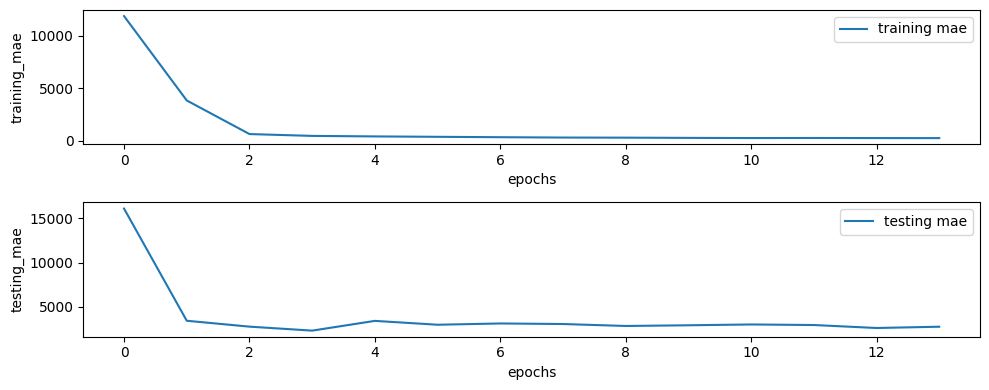

In [82]:
model_history = pd.DataFrame(training_4.history)
model_history['epoch'] = training_4.epoch

fig, ax = plt.subplots(2,1, figsize=(10,4))
num_epochs = model_history.shape[0]
num_epochs = model_history.shape[0]

ax[0].plot(np.arange(0, num_epochs), model_history["mae"], 
        label="training mae")
ax[1].plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="testing mae")



ax[0].set_ylabel('training_mae')
ax[0].set_xlabel('epochs')
ax[1].set_ylabel('testing_mae')
ax[1].set_xlabel('epochs')
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

In [83]:
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out[0])
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
y_out = layers.Dense(1)(x)

## compile
model_1 = models.Model([ price_data], y_out)

model_1.compile(loss=keras.losses.mae,
                    optimizer=keras.optimizers.Adam(learning_rate = 0.00001), 
                    metrics=['mae'])

## train
training_5 = model_1.fit(x_train, y_train, batch_size= 8, epochs=1028, shuffle=True,callbacks=callbacks, verbose=1,validation_split = 0.1)


Epoch 1/1028


179/179 [==============================] - 75s 116ms/step - loss: 11935.6934 - mae: 11935.6934 - val_loss: 16727.6816 - val_mae: 16727.6816
Epoch 2/1028
179/179 [==============================] - 15s 84ms/step - loss: 6765.5723 - mae: 6765.5723 - val_loss: 2943.5354 - val_mae: 2943.5354
Epoch 3/1028
179/179 [==============================] - 15s 84ms/step - loss: 561.3390 - mae: 561.3390 - val_loss: 2290.1929 - val_mae: 2290.1929
Epoch 4/1028
179/179 [==============================] - 14s 79ms/step - loss: 396.3141 - mae: 396.3141 - val_loss: 3133.3850 - val_mae: 3133.3850
Epoch 5/1028
179/179 [==============================] - 15s 85ms/step - loss: 353.3479 - mae: 353.3479 - val_loss: 2926.8076 - val_mae: 2926.8076
Epoch 6/1028
179/179 [==============================] - 16s 90ms/step - loss: 332.8286 - mae: 332.8286 - val_loss: 2777.8997 - val_mae: 2777.8997
Epoch 7/1028
179/179 [==============================] - 15s 82ms/step - loss: 299.8783 - mae: 299.8783 - val_loss: 3194.9490 - v

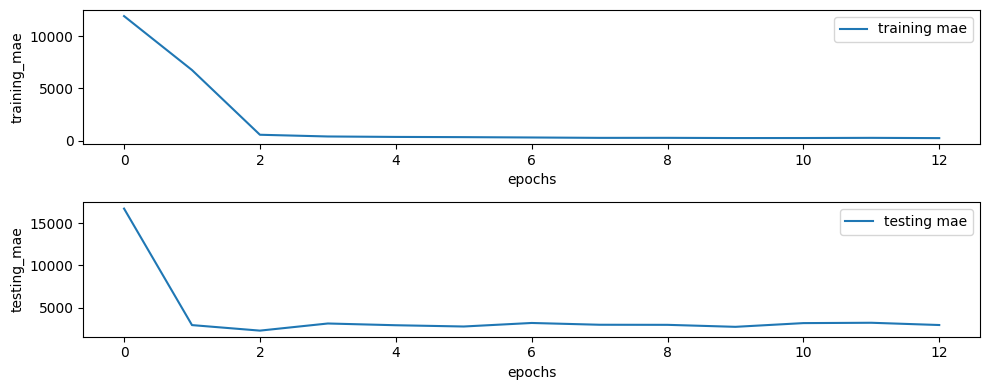

In [84]:
model_history = pd.DataFrame(training_5.history)
model_history['epoch'] = training_5.epoch

fig, ax = plt.subplots(2,1, figsize=(10,4))
num_epochs = model_history.shape[0]
num_epochs = model_history.shape[0]

ax[0].plot(np.arange(0, num_epochs), model_history["mae"], 
        label="training mae")
ax[1].plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="testing mae")



ax[0].set_ylabel('training_mae')
ax[0].set_xlabel('epochs')
ax[1].set_ylabel('testing_mae')
ax[1].set_xlabel('epochs')
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

In [85]:
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out[0])
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(512, activation="relu")(x)
y_out = layers.Dense(1)(x)

## compile
model_1 = models.Model([ price_data], y_out)

model_1.compile(loss=keras.losses.mae,
                    optimizer=keras.optimizers.Adam(learning_rate = 0.00001), 
                    metrics=['mae'])

## train
training_6 = model_1.fit(x_train, y_train, batch_size= 16, epochs=1028, shuffle=True,callbacks=callbacks, verbose=1,validation_split = 0.1)


Epoch 1/1028


90/90 [==============================] - 70s 172ms/step - loss: 11962.1055 - mae: 11962.1055 - val_loss: 16914.7441 - val_mae: 16914.7441
Epoch 2/1028
90/90 [==============================] - 7s 81ms/step - loss: 11912.3965 - mae: 11912.3965 - val_loss: 16781.2402 - val_mae: 16781.2402
Epoch 3/1028
90/90 [==============================] - 9s 96ms/step - loss: 11416.2266 - mae: 11416.2266 - val_loss: 15496.7275 - val_mae: 15496.7275
Epoch 4/1028
90/90 [==============================] - 8s 94ms/step - loss: 7403.9883 - mae: 7403.9883 - val_loss: 6326.7866 - val_mae: 6326.7866
Epoch 5/1028
90/90 [==============================] - 7s 81ms/step - loss: 1510.9879 - mae: 1510.9879 - val_loss: 3040.1746 - val_mae: 3040.1746
Epoch 6/1028
90/90 [==============================] - 8s 88ms/step - loss: 431.6885 - mae: 431.6885 - val_loss: 3439.7920 - val_mae: 3439.7920
Epoch 7/1028
90/90 [==============================] - 7s 77ms/step - loss: 327.1863 - mae: 327.1863 - val_loss: 3044.6611 - val_mae

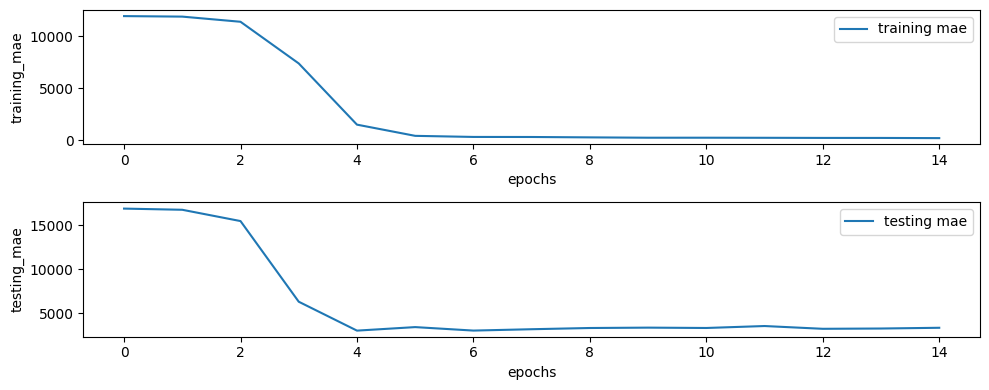

In [86]:
model_history = pd.DataFrame(training_6.history)
model_history['epoch'] = training_6.epoch

fig, ax = plt.subplots(2,1, figsize=(10,4))
num_epochs = model_history.shape[0]
num_epochs = model_history.shape[0]

ax[0].plot(np.arange(0, num_epochs), model_history["mae"], 
        label="training mae")
ax[1].plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="testing mae")



ax[0].set_ylabel('training_mae')
ax[0].set_xlabel('epochs')
ax[1].set_ylabel('testing_mae')
ax[1].set_xlabel('epochs')
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()